**Preparation and necessary tools**

In [3]:
from Lyapunov import *
from dynamics_toolkit import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from tqdm import tqdm
from torch.autograd.functional import jacobian
from torch import tensor, dot, matmul, transpose, stack, log
from scipy.linalg import block_diag, circulant
from scipy.stats import dirichlet, multivariate_normal
from scipy.special import xlogy
from itertools import product, combinations

In [69]:
A = circulant([0.5,-1,1]); B = circulant([-0.3,-1,1])
my_replicator = twoD_replicator(A,B,0.0198,0.01)
x_int = np.array([0.26,0.113333,0.626667,0.165,0.772549,0.062451])
# x_int = [0.05, 0.35, 0.6, 0.1, 0.2, 0.7]

# compute orbits
ts = np.linspace(0,3000,30001)
xt = odeint(my_replicator.replicator, x_int, ts)
# xt = odeint(new_replicator, x_int, ts)

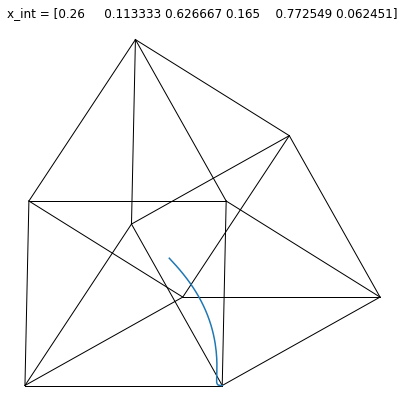

In [70]:
orbit = proj_6D_2D(xt.T)
fig, ax = initial_6D_2D_figure(figsize=(7,7))
ax.plot(orbit[0], orbit[1])
ax.set_title(f"x_int = {x_int}")
plt.savefig("trifoil")

In [6]:
def localmax(arr):
    return arr[1:-1][(arr[2:] <arr[1:-1]) * (arr[1:-1] >= arr[:-2])]

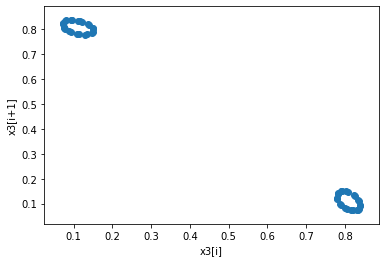

In [65]:
lorenz_x3 = localmax(xt.T[2])

plt.scatter(lorenz_x3[0:-2], lorenz_x3[1:-1])
plt.xlabel("x3[i]")
plt.ylabel("x3[i+1]")
plt.savefig("lorenz_trifoil")

Lyapunov Exponent

In [71]:
# x_equi = np.ones(6)/3
# x_int = simulate_close(x_equi, 0.1, state=0)
x_int = np.array([0.26,0.113333,0.626667,0.165,0.772549,0.062451])
Lambda0, x_arr0 = Lyapunov(stable_adaptive_RSP.adaptive_tensor, x_int, interval=0.01, step=3000, show_x=True)

100%|██████████| 3000/3000 [20:52<00:00,  2.40it/s]


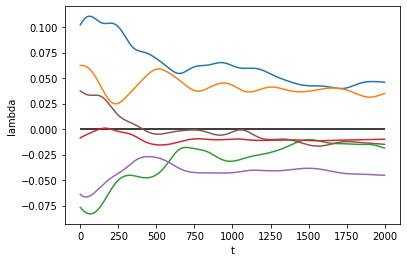

In [74]:
plt.plot(Lambda0[1000:,])
plt.hlines([0], xmin=0, xmax=2000)
plt.xlabel("t")
plt.ylabel("lambda")
plt.savefig("RSP_Lyapunov2")

In [31]:
x_int = np.array([0.26,0.113333,0.626667,0.165,0.772549,0.062451])
Lambda1, x_arr1 = Lyapunov(my_replicator.replicator_tensor, x_int, interval=0.01, step=3000, show_x=True)

100%|██████████| 3000/3000 [10:34<00:00,  4.73it/s]


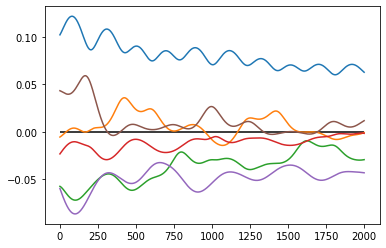

In [36]:
plt.plot(Lambda0[1000:,])
plt.hlines([0], xmin=0, xmax=2000)

Adaptive Learning with memory loss.

In [12]:
def adaptive_2D_RSP(epsilon1, epsilon2, alpha1, alpha2):
    A = circulant([epsilon1, -1, 1]) - (epsilon1/3)*np.ones((3,3))
    B = circulant([epsilon2, -1, 1]) - (epsilon2/3)*np.ones((3,3))
    return twoD_replicator(A,B,0,alpha1,alpha2)

In [22]:
stable_adaptive_RSP = adaptive_2D_RSP(0.5,-0.3,0.019,0.01)

In [23]:
x_int = np.array([0.26,0.113333,0.626667,0.165,0.772549,0.062451])
# x_int = np.array([0.8,0.1,0.1,0.6,0.3,0.1])
# x_int = [0.05, 0.35, 0.6, 0.1, 0.2, 0.7]

# compute orbits
ts = np.linspace(0,2000,200001)
xt_adaptive = odeint(stable_adaptive_RSP.adaptive, x_int, ts)
# xt = odeint(new_replicator, x_int, ts)

1

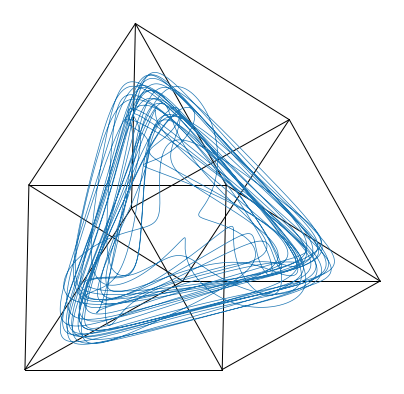

In [24]:
orbit = proj_6D_2D(xt_adaptive.T)
fig, ax = initial_6D_2D_figure(figsize=(7,7))
ax.plot(orbit[0,150000:], orbit[1,150000:], linewidth=.7)
# ax.plot(orbit[0], orbit[1], linewidth=.7)
1

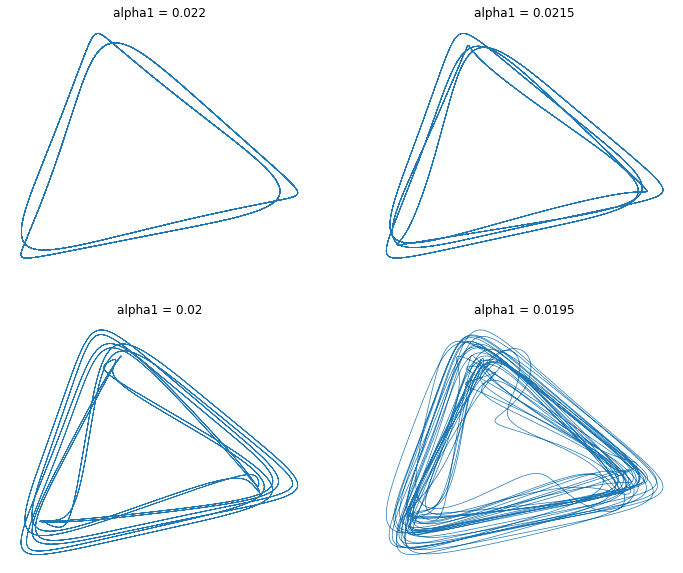

In [61]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12,10))
idx = [(0,0), (0,1), (1,0), (1,1)]
alpha1_arr = [0.022, 0.0215, 0.02, 0.0195]
x_int = np.array([0.26,0.113333,0.626667,0.165,0.772549,0.062451])
ts = np.linspace(0,2000,200001)

for i in range(4):
    alpha1 = alpha1_arr[i]
    replicator_alpha = adaptive_2D_RSP(0.5, -0.3, alpha1, 0.01)
    xt_adaptive = odeint(replicator_alpha.adaptive, x_int, ts)
    orbit = proj_6D_2D(xt_adaptive.T)
    ax[idx[i]].axis("off")
    ax[idx[i]].plot(orbit[0,150000:], orbit[1,150000:], linewidth=.7)
    ax[idx[i]].set_title(f"alpha1 = {alpha1}")

plt.savefig("Period_doubling")

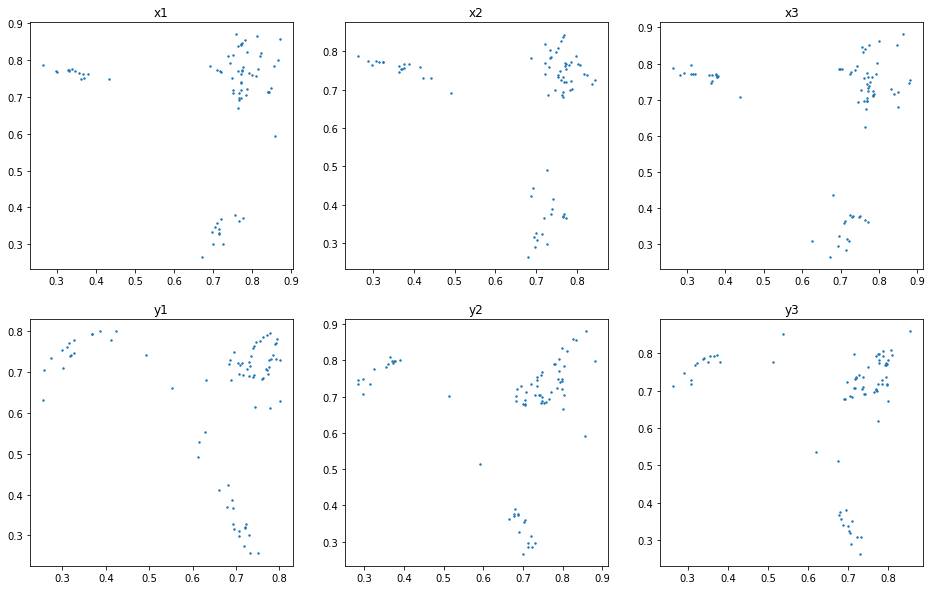

In [66]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(16,10))
idx = [(0,0), (0,1), (0,2), (1,0), (1,1), (1,2)]
titles = ["x1", "x2", "x3", "y1", "y2", "y3"]

for i in range(6):
    return_map = localmax(xt_adaptive.T[i,100000:])
    ax[idx[i]].scatter(return_map[0:-2], return_map[1:-1], s=2)
    ax[idx[i]].set_title(titles[i])

plt.savefig("return_map_chaos")

Return map

In [33]:
x_int = np.array([0.8,0.1,0.1,0.6,0.3,0.1])
ts = np.linspace(0,2000,200001)
alpha_freq = []
return_arr = []

for alpha1 in tqdm(np.linspace(0.0220,0.0195,1000), position=0, leave=True):
    adaptive_RSP_alpha = adaptive_2D_RSP(0.5,-0.3,alpha1,0.01)
    xt_adaptive = odeint(adaptive_RSP_alpha.adaptive, x_int, ts)
    return_map = localmax(xt_adaptive.T[3,50000:])
    alpha_freq += [return_map.size]
    return_arr += list(return_map)

100%|██████████| 1000/1000 [29:41<00:00,  1.78s/it]


In [34]:
alpha_arr = [list(np.linspace(0.0220,0.0195,1000)[i]*np.ones(alpha_freq[i])) for i in range(len(np.linspace(0.0220,0.0195,1000)))]

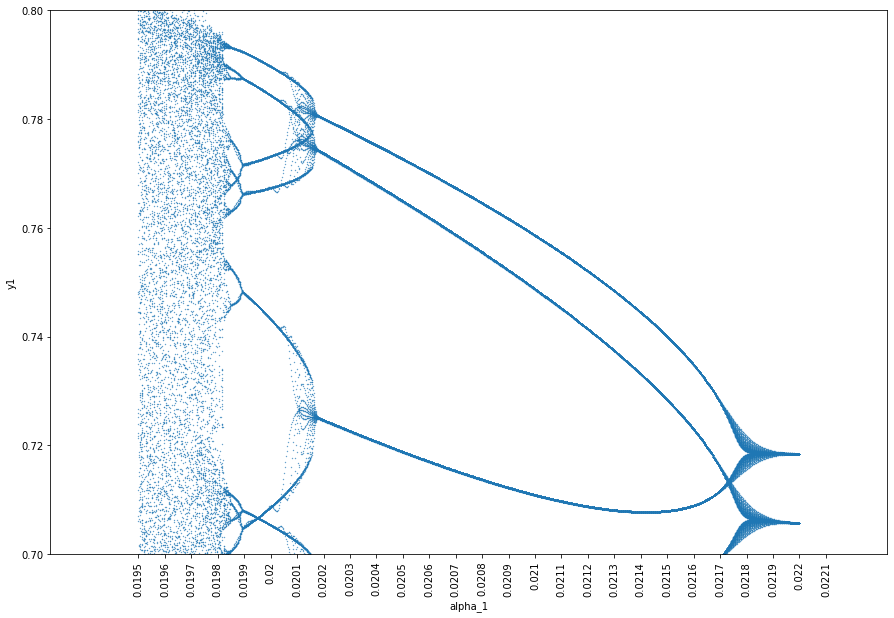

In [60]:
def flatten(t):
    return [item for sublist in t for item in sublist]

fig_BifMap, ax_BifMap = plt.subplots(figsize = (15,10))
ax_BifMap.scatter(flatten(alpha_arr), return_arr, s=0.1)
ax_BifMap.set_ylim([0.7,0.8])
ax_BifMap.set_xticks(np.arange(0.0195,0.0221,0.0001))
ax_BifMap.set_xticklabels(np.round(np.arange(0.0195,0.0221,0.0001),4), rotation=90)
ax_BifMap.set_xlabel("alpha_1")
ax_BifMap.set_ylabel("y1")
plt.savefig("Doubling_Cascade")